In [12]:
import cv2
import numpy as np

# Load an image in grayscale
image = cv2.imread('5bd946a6cdbadfc416e59db42422c06c.jpg', cv2.IMREAD_GRAYSCALE)

# Flatten the pixel values
pixel_features = image.flatten()
print("Pixel Features:", pixel_features[:10])  # Print the first 10 features


Pixel Features: [49 53 53 50 49 51 50 45 48 48]


In [13]:
# Load image in color
image = cv2.imread('5bd946a6cdbadfc416e59db42422c06c.jpg')

# Calculate histograms for each channel
color_features = []
for i in range(3):  # BGR channels
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    color_features.extend(hist.flatten())
print("Color Features:", color_features[:10])  # Print the first 10 features


Color Features: [933.0, 106.0, 136.0, 125.0, 160.0, 132.0, 190.0, 175.0, 201.0, 227.0]


In [51]:
import cv2
import numpy as np

# Load the image as grayscale
file_path = '5bd946a6cdbadfc416e59db42422c06c.jpg'
image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Unable to load the image. Check the file path or format.")
else:
    print("Image loaded successfully.")

    # Optional: Threshold the image to binary for better contour detection
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

    # Check the image type
    if binary_image.ndim != 2:
        print("Error: The image is not a 2D array. It must be grayscale.")
    else:
        # Find contours on the binary image
        contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        print(f"Number of contours found: {len(contours)}")

        # Extract moments from contours
        for i, contour in enumerate(contours):
            moments = cv2.moments(contour)
            if moments["m00"] != 0:  # Ensure the contour has a non-zero area
                hu_moments = cv2.HuMoments(moments).flatten()
                print(f"Contour {i + 1} Hu Moments (first 3):", hu_moments[:3])  # Print first 3 Hu moments
            else:
                print(f"Contour {i + 1} has zero area and is skipped.")



Image loaded successfully.
Number of contours found: 715
Contour 1 Hu Moments (first 3): [1.15022932 1.28622382 0.44378419]
Contour 2 Hu Moments (first 3): [1.66828265e-01 1.47840549e-03 1.19183509e-04]
Contour 3 has zero area and is skipped.
Contour 4 Hu Moments (first 3): [0.68688635 0.40795998 0.01118912]
Contour 5 Hu Moments (first 3): [0.32771996 0.00071963 0.00099749]
Contour 6 Hu Moments (first 3): [0.32818163 0.00097827 0.00142555]
Contour 7 Hu Moments (first 3): [2.01952083e-01 1.45701005e-03 8.37362770e-05]
Contour 8 Hu Moments (first 3): [0.33674646 0.03801345 0.00209841]
Contour 9 Hu Moments (first 3): [0.79262585 0.58968334 0.01419524]
Contour 10 Hu Moments (first 3): [0.38468294 0.0809412  0.00460483]
Contour 11 Hu Moments (first 3): [0.66330524 0.40470851 0.00853187]
Contour 12 Hu Moments (first 3): [0.6727688  0.41940086 0.00633301]
Contour 13 Hu Moments (first 3): [0.62311284 0.3567932  0.00455513]
Contour 14 Hu Moments (first 3): [0.56105051 0.28449943 0.00262273]
Con

In [22]:
# ORB feature detection
orb = cv2.ORB_create()
keypoints, descriptors = orb.detectAndCompute(image, None)
print("Keypoints Detected:", len(keypoints))


Keypoints Detected: 500


Image loaded successfully.


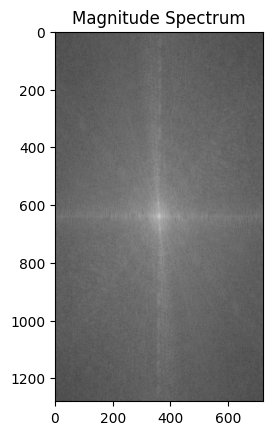

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image as grayscale
file_path = '5bd946a6cdbadfc416e59db42422c06c.jpg'
image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Unable to load the image. Check the file path or format.")
else:
    print("Image loaded successfully.")

    # Apply Fourier Transform
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)  # Shift zero frequency to the center
    magnitude_spectrum = 20 * np.log(np.abs(fshift))

    # Display the magnitude spectrum using Matplotlib
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title("Magnitude Spectrum")
    plt.show()
